<a href="https://colab.research.google.com/github/abhishekahuja35/ExploratoryDataAnalysis_SuicideRate/blob/main/EDA_SuicideRateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import files
from google.colab import files
uploaded = files.upload()

Saving HumanResources.csv to HumanResources.csv
Saving Facilities.csv to Facilities.csv
Saving CrudeSuicideRates.csv to CrudeSuicideRates.csv
Saving Age_standardizedSuicideRates.csv to Age_standardizedSuicideRates.csv


In [ ]:
#install the required library for plotting charts
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=e8b6429705dde67e4fa206e6bc68dc373d9806bd0bae03f9777e03bfb6d43514
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
#import the libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio import plotly
from plotly import graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import io

In [ ]:
#read the files imported and save them in a dataframe
age_standardized = pd.read_csv(io.BytesIO(uploaded["Age_standardizedSuicideRates.csv"]))
suicideRates = pd.read_csv(io.BytesIO(uploaded["CrudeSuicideRates.csv"]))
facilities = pd.read_csv(io.BytesIO(uploaded["Facilities.csv"]))
humanResources = pd.read_csv(io.BytesIO(uploaded["HumanResources.csv"]))

In [ ]:
#get info of all the dataframes
print(suicideRates.info())
print(age_standardized.info())
print(facilities.info())
print(humanResources.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    549 non-null    object 
 1   Sex        549 non-null    object 
 2    80_above  549 non-null    float64
 3    70to79    549 non-null    float64
 4    60to69    549 non-null    float64
 5    50to59    549 non-null    float64
 6    40to49    549 non-null    float64
 7    30to39    549 non-null    float64
 8    20to29    549 non-null    float64
 9    10to19    549 non-null    float64
dtypes: float64(8), object(2)
memory usage: 43.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  549 non-null    object 
 1   Sex      549 non-null    object 
 2   2016     549 non-null    float64
 3   2015     549 non-null    float64
 4   2010     549 non-nul

In [ ]:
#print first 5 lines of all the datasets to see the columns and data
print(age_standardized.head())
print(suicideRates.head())
print(facilities.head())
print(humanResources.head())

       Country          Sex  2016  2015  2010  2000
0  Afghanistan   Both sexes   6.4   6.6   7.4   8.1
1  Afghanistan         Male  10.6  10.9  12.5  14.3
2  Afghanistan       Female   2.1   2.1   2.1   1.7
3      Albania   Both sexes   5.6   5.3   7.7   5.8
4      Albania         Male   7.0   6.7   9.5   8.2
       Country          Sex   80_above   70to79   60to69    50to59    40to49  \
0  Afghanistan   Both sexes       42.0     11.0       5.5       5.6      6.6   
1  Afghanistan         Male       70.4     20.9       9.8       9.3     10.5   
2  Afghanistan       Female       20.1      2.3       1.4       1.6      2.3   
3      Albania   Both sexes       16.3      8.3       6.0       7.8      9.1   
4      Albania         Male       23.2     11.9       8.1      11.4     13.5   

    30to39   20to29   10to19  
0      9.2     10.2      3.1  
1     15.1     16.3      4.8  
2      2.7      3.5      1.2  
3      6.1      6.5      5.0  
4      8.8      6.3      3.1  
               Countr

In [ ]:
#to filter out the data of only both sexes (don't need each sex data separately)
is_BothSexes = suicideRates['Sex'] == " Both sexes"

suicideRates_bothSexes=suicideRates[is_BothSexes]
print(suicideRates_bothSexes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 546
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    183 non-null    object 
 1   Sex        183 non-null    object 
 2    80_above  183 non-null    float64
 3    70to79    183 non-null    float64
 4    60to69    183 non-null    float64
 5    50to59    183 non-null    float64
 6    40to49    183 non-null    float64
 7    30to39    183 non-null    float64
 8    20to29    183 non-null    float64
 9    10to19    183 non-null    float64
dtypes: float64(8), object(2)
memory usage: 15.7+ KB
None


In [ ]:
#calculate mean suicide rate by age groups
suicideRatesMeanbyAge_bothSexes = suicideRates_bothSexes[[' 10to19',' 20to29',' 30to39',' 40to49',' 50to59 ',' 60to69 ',' 70to79',' 80_above']].mean(axis=0)
print(suicideRatesMeanbyAge_bothSexes)

 10to19       4.092896
 20to29      10.500546
 30to39      10.921311
 40to49      12.159563
 50to59      14.586885
 60to69      17.074863
 70to79      24.925683
 80_above    39.556831
dtype: float64


[Text(0, 0.5, 'Mean Suicide Rate for 100k pop'),
 Text(0.5, 0, 'Age Group'),
 Text(0.5, 1.0, 'Mean Suicide Rate for each age group')]

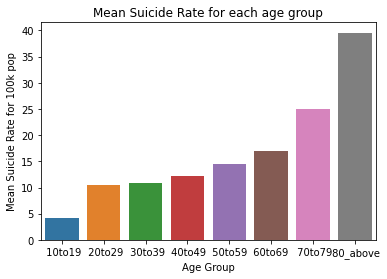

In [ ]:
#plot a bar chart of mean suicide rate of each age group
age_suicide_Plot = sns.barplot(x=suicideRatesMeanbyAge_bothSexes.index, y=suicideRatesMeanbyAge_bothSexes.values)
age_suicide_Plot.set(xlabel='Age Group', ylabel='Mean Suicide Rate for 100k pop', title = "Mean Suicide Rate for each age group" )

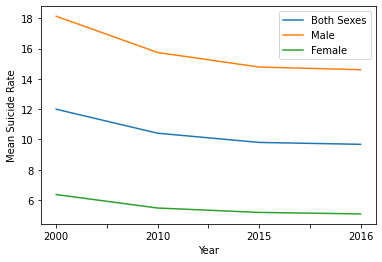

In [ ]:
#trend analysis - for each gender as well as mean

age_standardized_bothSexes=age_standardized[is_BothSexes]
age_standardized_mean_bothSexes = age_standardized_bothSexes[['2000','2010','2015','2016']].mean(axis=0)
age_standardized_mean_bothSexes.plot(xlabel = 'Year', ylabel = 'Mean Suicide Rate', label='Both Sexes')

age_standardized_male=age_standardized[age_standardized['Sex'] == " Male"]
age_standardized_mean_male = age_standardized_male[['2000','2010','2015','2016']].mean(axis=0)
age_standardized_mean_male.plot(xlabel = 'Year', ylabel = 'Mean Suicide Rate', label='Male')

age_standardized_female=age_standardized[age_standardized['Sex'] == " Female"]
age_standardized_mean_female = age_standardized_female[['2000','2010','2015','2016']].mean(axis=0)
age_standardized_mean_female.plot(xlabel = 'Year', ylabel = 'Mean Suicide Rate', label='Female')

plt.legend()

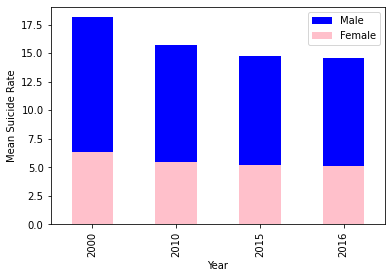

In [ ]:
age_standardized_mean_male.plot.bar(xlabel = 'Year', ylabel = 'Mean Suicide Rate', label='Male',color='blue')
age_standardized_mean_female.plot.bar(xlabel = 'Year', ylabel = 'Mean Suicide Rate', label='Female',color='pink')

plt.legend()

In [ ]:
#calculate totals
age_standardized['total']=age_standardized[['2000','2010','2015','2016']].sum(axis=1)
age_standardized_bothSexes['total']=age_standardized_bothSexes[['2000','2010','2015','2016']].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
age_standardized_bothSexes.head()

,Country,Sex,2016,2015,2010,2000,total
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1,28.5
3,Albania,Both sexes,5.6,5.3,7.7,5.8,24.4
6,Algeria,Both sexes,3.3,3.4,3.5,4.7,14.9
9,Angola,Both sexes,8.9,9.3,10.4,13.9,42.5
12,Antigua and Barbuda,Both sexes,0.5,0.8,0.2,2.1,3.6


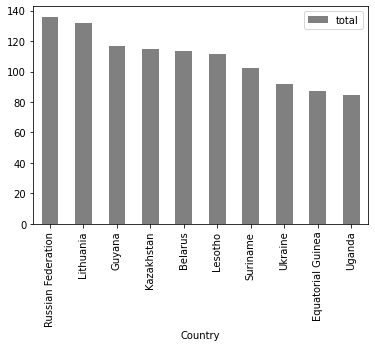

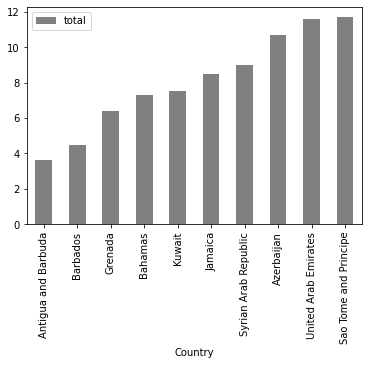

In [ ]:
#finding the top and bottom countries in suicide rate in 21st century
top_suicide=age_standardized_bothSexes.nlargest(10, 'total')
top_suicide_bar=top_suicide.plot.bar('Country','total', color='grey')

low_suicide=age_standardized_bothSexes.nsmallest(10, 'total')
low_suicide_bar=low_suicide.plot.bar('Country','total',color='grey')

In [ ]:
#modifying the dataset for plotting world map with suicide rate
world_map_df=age_standardized_bothSexes.drop(columns=['Sex','2015','2010','2000','total'])
world_map_df=world_map_df.reset_index().drop(columns='index')
world_map_df=world_map_df.rename(columns={'2016':'Suicide Rate'})

In [ ]:
#plotting world map with suicide rate
data_map=dict(type='choropleth',
              locations=world_map_df['Country'],
              locationmode='country names',
              z=world_map_df['Suicide Rate'],
              text=world_map_df['Country'],
              colorscale='Reds',
              reversescale=False,
              colorbar={'title':'Suicide Rate/100k'})

map_layout= dict(title= 'World Suicide Rate (2016)',
             geo= dict(showframe=True,
                       showcoastlines=True,
                       projection={'type':'miller'}))

world_map= go.Figure(data=[data_map],layout=map_layout)
iplot(world_map)

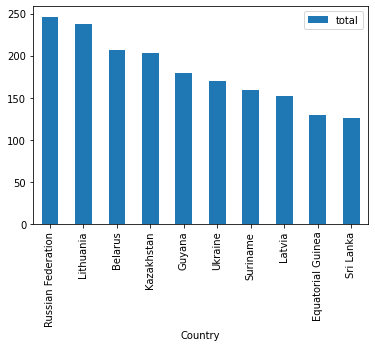

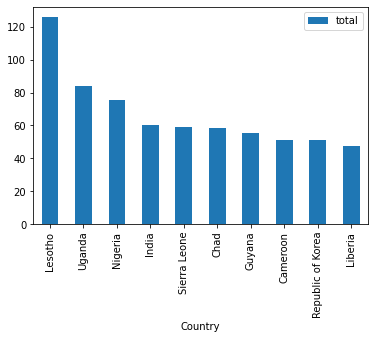

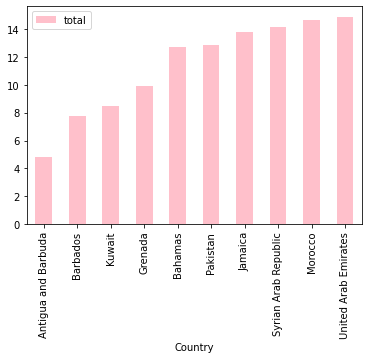

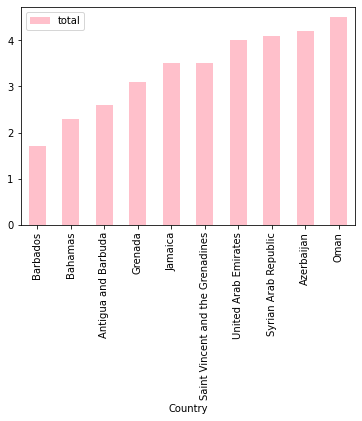

In [ ]:
#finding the countries with suicide rate for each gender
top_suicide_male=age_standardized[age_standardized['Sex'] == " Male"].nlargest(10,'total')
top_suicide_male_bar=top_suicide_male.plot.bar('Country','total')

top_suicide_female=age_standardized[age_standardized['Sex'] == " Female"].nlargest(10,'total')
top_suicide_female_bar=top_suicide_female.plot.bar('Country','total')

low_suicide_male=age_standardized[age_standardized['Sex'] == " Male"].nsmallest(10,'total')
low_suicide_male_bar=low_suicide_male.plot.bar('Country','total', color = 'pink')

low_suicide_female=age_standardized[age_standardized['Sex'] == " Female"].nsmallest(10,'total')
low_suicide_female_bar=low_suicide_female.plot.bar('Country','total',color='pink')

In [ ]:
#modifying data set for finding correlation factors with respect to different human resources and facilities
total_suicide_rate=age_standardized.copy(deep=True)
total_suicide_rate=total_suicide_rate[total_suicide_rate.Sex == ' Both sexes']
total_suicide_rate.drop(['2016','2015','2010','2000','Sex'],axis=1)
merge1=pd.merge(facilities,humanResources,on='Country')
final_table=pd.merge(merge1,total_suicide_rate,on='Country')
final_table=final_table.drop(['2016','2015','2010','2000','Sex','Year_x','Year_y'],axis=1)

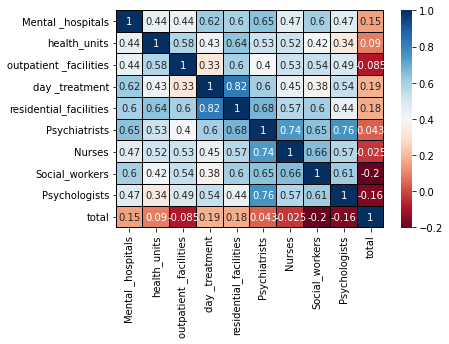

In [ ]:
#plotting heat map to find relevant factors
correlation=final_table.corr(method='spearman')
sns.heatmap(correlation, linewidths=0.01, annot=True, cmap='RdBu',linecolor='black')

The factors don't show any strong correlation with the total suicide rate

Text(0, 0.5, 'Social Workers')

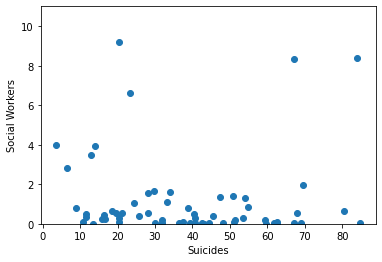

In [ ]:
#plotting scatterplot to see the relation
plt.scatter(final_table["total"],final_table["Social_workers"])
plt.ylim(0, 11) #to limit the extreme abnormalities in data
plt.xlabel('Suicides')
plt.ylabel('Social Workers')

As we can see, there's more data on the left side, which depicts why the correlation is -0.2, but the data is limited to support a high correlation

LINEAR REGRESSION

In [ ]:
#importing libraries for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
model_data=age_standardized.copy(deep=True)

#transforming the dataset to be used for linear regression modeling
model_data = model_data.sort_values("total", ascending = False)
model_data.reset_index(drop = True, inplace = True)

sex = pd.get_dummies(model_data["Sex"], drop_first = True)
model_data = pd.concat([model_data, sex], axis = 1)
model_data.head()

,Country,Sex,2016,2015,2010,2000,total,Female,Male
0,Russian Federation,Male,48.3,49.9,62.3,85.8,246.3,0,1
1,Lithuania,Male,47.5,51.5,56.4,81.7,237.1,0,1
2,Belarus,Male,39.3,39.2,58.1,70.4,207.0,0,1
3,Kazakhstan,Male,40.1,44.2,56.1,63.1,203.5,0,1
4,Guyana,Male,46.6,46.6,44.9,41.2,179.3,0,1


In [ ]:
#the sex column is now transformed so that the gender is now coded in 0 and 1, eliminating the need for separate columns
model_data.drop(["Sex", " Female"], axis=1, inplace  = True)
model_data.head()

,Country,2016,2015,2010,2000,total,Male
0,Russian Federation,48.3,49.9,62.3,85.8,246.3,1
1,Lithuania,47.5,51.5,56.4,81.7,237.1,1
2,Belarus,39.3,39.2,58.1,70.4,207.0,1
3,Kazakhstan,40.1,44.2,56.1,63.1,203.5,1
4,Guyana,46.6,46.6,44.9,41.2,179.3,1


In [ ]:
#now simplifying the data set to make sure the data is compatible to be trained with the sklearn

model_data_melt = pd.melt(model_data, id_vars = ["Country", " Male", "total"], var_name = "Year", value_name = "Suicide Rate")
model_data_melt.drop(columns = "total", inplace = True)
model_data_melt.head()

,Country,Male,Year,Suicide Rate
0,Russian Federation,1,2016,48.3
1,Lithuania,1,2016,47.5
2,Belarus,1,2016,39.3
3,Kazakhstan,1,2016,40.1
4,Guyana,1,2016,46.6


In [ ]:
#assigning features to x
X=model_data_melt[[' Male','Year']]

#assigning predictor to y
y=model_data_melt['Suicide Rate']

In [ ]:
#splitting the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#training the linear regression model on the training set
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
pred = model_lr.predict(x_test)

In [ ]:
#finding the coefficients to determine the impact of factors on the predictor
coeff= pd.DataFrame(model_lr.coef_,X.columns,columns=['Coefficient'])
print(coeff)

       Coefficient
 Male     8.121697
Year     -0.149754


In [ ]:
#using the linear model to predict the suicide rate
#factor1: gender - 1 is male, 0 is female
#factor2: year
print(model_lr.predict([[1,2020]])) #predicting the suicide rate of male in year 2020

[14.66919314]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

